## Business Problem:

One of the global banks would like to understand what factors driving credit card spend are. The bank want use these insights to calculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data.

The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants.

**Data Availability:**
-  Data for the case are available in xlsx format.
-  The data have been provided for 5000 customers.
-  Detailed data dictionary has been provided for understanding the data in the data.
-  Data is encoded in the numerical format to reduce the size of the data however some of the variables are categorical.   You can find the details in the data dictionary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 10, 7.5
# plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

<Figure size 432x288 with 0 Axes>

In [483]:
credit = pd.read_excel('Data Set.xlsx')

In [5]:
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [7]:
credit.describe()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,2.687275,0.503600,47.025600,4.238800,14.543000,2.672000,2.7528,0.15120,9.730400,...,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,1.425925,0.500037,17.770338,1.308785,3.281083,1.211738,1.7379,0.35828,9.690929,...,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,1.000000,0.000000,18.000000,2.000000,6.000000,1.000000,1.0000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,1.000000,0.000000,31.000000,3.000000,12.000000,2.000000,1.0000,0.00000,2.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,3.000000,1.000000,47.000000,4.000000,14.000000,2.000000,2.0000,0.00000,7.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,4.000000,1.000000,62.000000,5.000000,17.000000,4.000000,4.0000,0.00000,15.000000,...,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.00000,5.000000,1.000000,79.000000,6.000000,23.000000,5.000000,6.0000,1.00000,52.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Univariate Analysis

In [12]:
pandas_profiling.ProfileReport(credit)

Number of variables,130
Number of observations,5000
Total Missing (%),0.2%
Total size in memory,5.0 MiB
Average record size in memory,1.0 KiB
Numeric,59
Categorical,1
Boolean,49
Date,0
Text (Unique),1
Rejected,20


Warnings

addresscat is highly correlated with address (ρ = 0.92352) Rejected
agecat is highly correlated with age (ρ = 0.96988) Rejected
card2tenure is highly correlated with cardtenure (ρ = 0.96298) Rejected
card2tenurecat is highly correlated with card2tenure (ρ = 0.92439) Rejected
commutecat is highly correlated with commute (ρ = 0.98117) Rejected
edcat is highly correlated with ed (ρ = 0.9639) Rejected
equipmon is highly correlated with equip (ρ = 0.94051) Rejected
inccat is highly correlated with lninc (ρ = 0.94879) Rejected
lncardmon is highly correlated with cardmon (ρ = 0.91687) Rejected
lncardten has 1422 / 28.4% missing values Missing
lnequipmon is highly correlated with equipmon (ρ = 0.97931) Rejected
lnequipten is highly correlated with lntollten (ρ = 0.96611) Rejected
lnlongten is highly correlated with lnlongmon (ρ = 0.92171) Rejected
lntollmon is highly correlated with tollmon (ρ = 0.93783) Rejected
lntollten is highly correlated with lnlongten (ρ = 0.93139) Rejected
lnwiremon is highly correlated with wiremon (ρ = 0.95389) Rejected
lnwireten is highly correlated with lnequipten (ρ = 0.98318) Rejected
longten is highly correlated with longmon (ρ = 0.9857) Rejected
spoused is highly correlated with marital (ρ = 0.95577) Rejected
spousedcat is highly correlated with spoused (ρ = 0.98403) Rejected
tenure is highly correlated with card2tenure (ρ = 0.92824) Rejected

address has 245 / 4.9% zeros Zeros
carbought has 2901 / 58.0% zeros Zeros
card2spent has 179 / 3.6% zeros Zeros
cardmon has 1419 / 28.4% zeros Zeros
cardten has 1420 / 28.4% zeros Zeros
cardtenure has 91 / 1.8% zeros Zeros
carown has 799 / 16.0% zeros Zeros
cars has 497 / 9.9% zeros Zeros
cartype has 2287 / 45.7% zeros Zeros
employ has 659 / 13.2% zeros Zeros
equipten has 3296 / 65.9% zeros Zeros
hourstv has 85 / 1.7% zeros Zeros
internet has 2498 / 50.0% zeros Zeros
tollmon has 2622 / 52.4% zeros Zeros
tollten has 2622 / 52.4% zeros Zeros
wiremon has 3656 / 73.1% zeros Zeros
wireten has 3656 / 73.1% zeros Zeros
pets has 1529 / 30.6% zeros Zeros
pets_birds has 4698 / 94.0% zeros Zeros
pets_cats has 3413 / 68.3% zeros Zeros
pets_dogs has 3762 / 75.2% zeros Zeros
pets_freshfish has 3462 / 69.2% zeros Zeros
pets_reptiles has 4818 / 96.4% zeros Zeros
pets_saltfish has 4942 / 98.8% zeros Zeros
pets_small has 4749 / 95.0% zeros Zeros

In [37]:
# Checking correlation between each x variables with the respose variable.

# credit.corrwith(credit.cardspent).plot.bar(figsize = (70, 40), title = 'correlation with the Response Variable', fontsize = 15, rot = 45, grid = True)

In [5]:
features=['region', 'townsize', 'gender', 'agecat','edcat','retire','inccat','default','marital',\
          'cartype','commutecat','cardtenurecat','card2tenurecat','internet','owntv','ownpc','response_01','response_02',\
         'response_03']

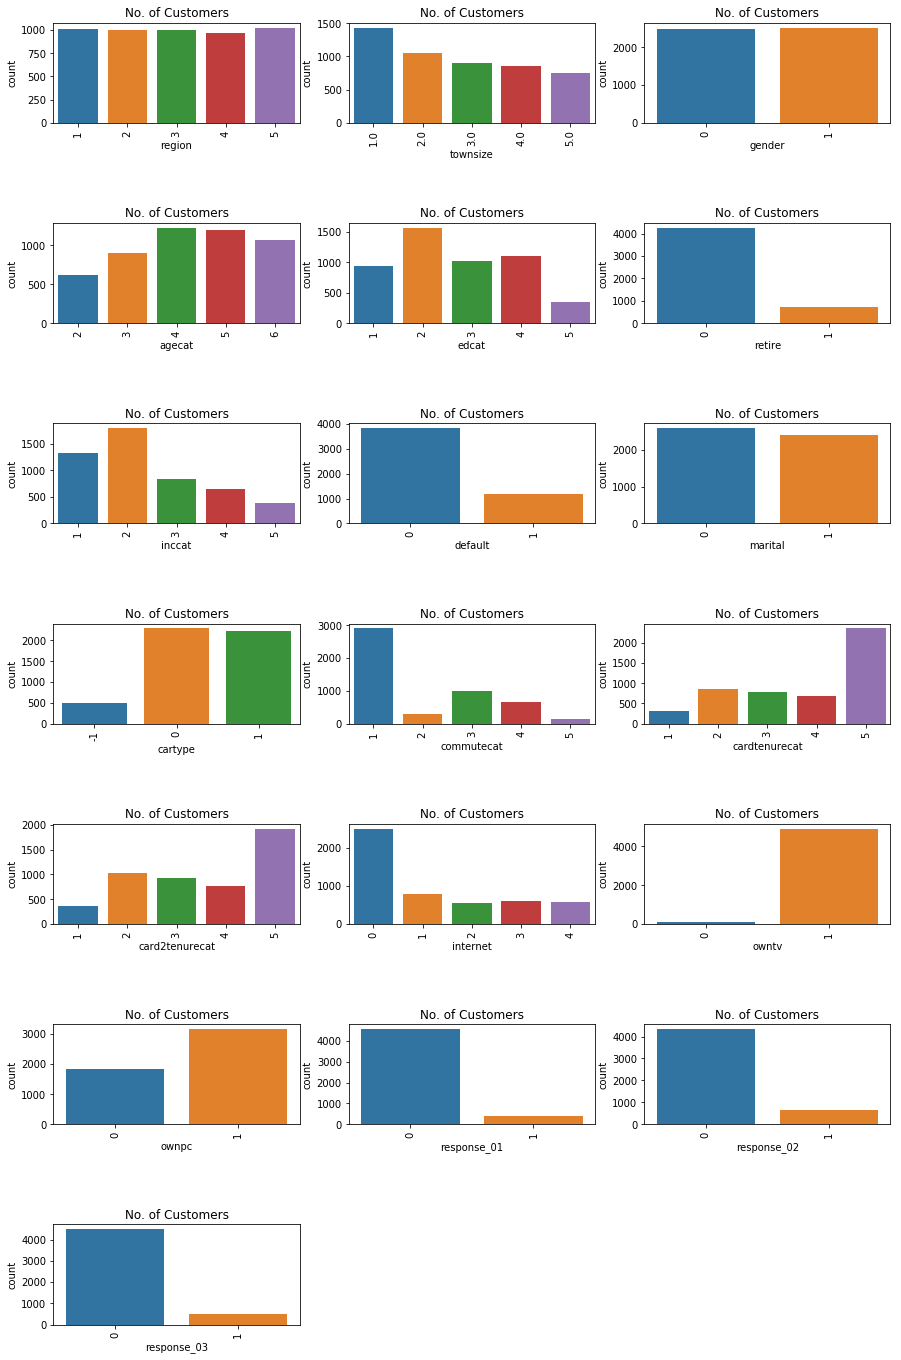

In [29]:
fig=plt.subplots(figsize=(15,35))
for i, j in enumerate(features):
    plt.subplot(10, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = credit)
    plt.xticks(rotation=90)
    plt.title("No. of Customers")

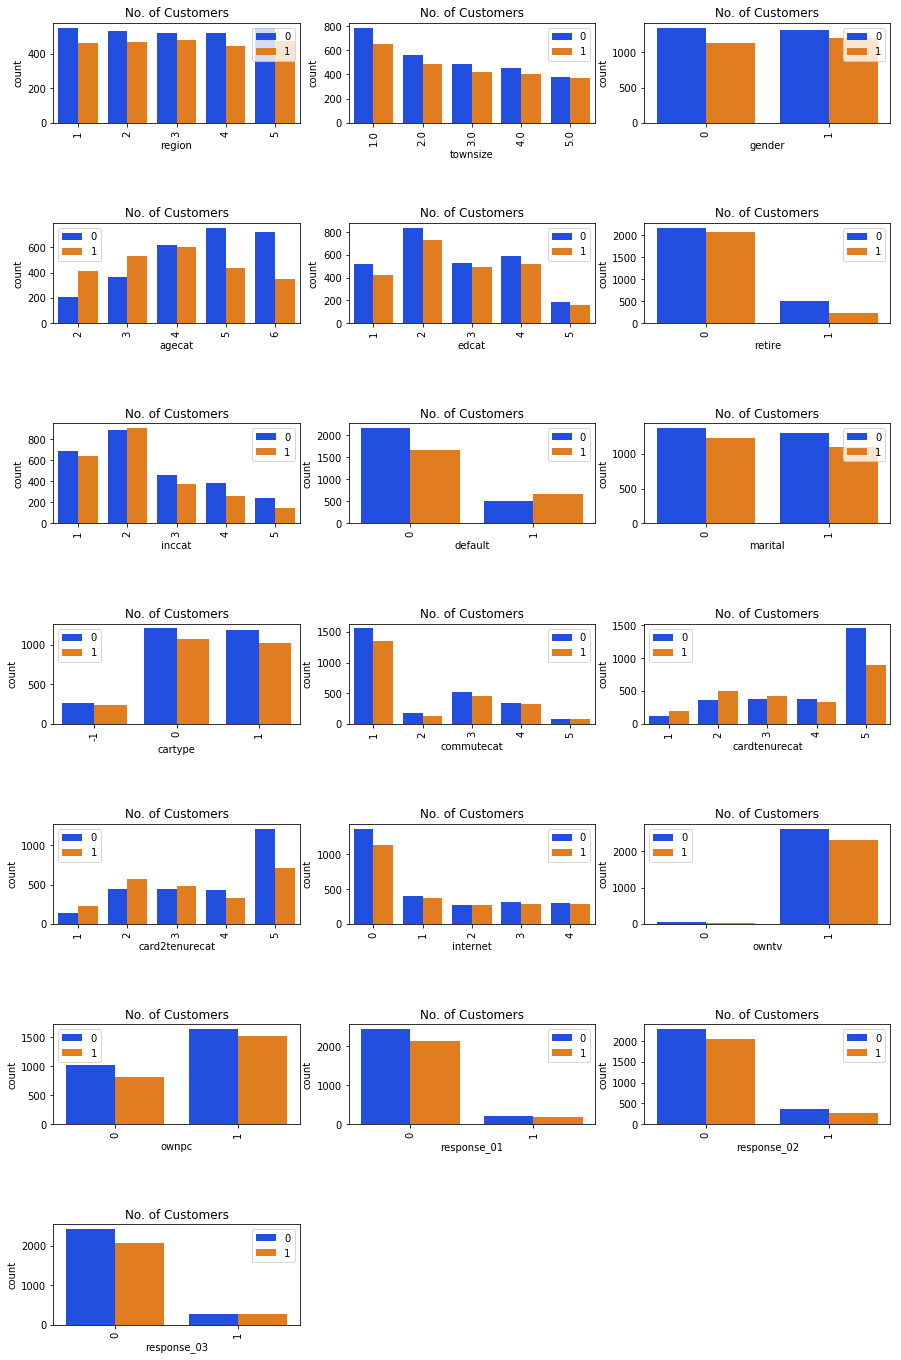

In [27]:
fig=plt.subplots(figsize=(15,35))
for i, j in enumerate(features):
    plt.subplot(10, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = credit, hue='active', palette="bright")
    plt.xticks(rotation=90)
    plt.title("No. of Customers")
    plt.legend(loc=None)

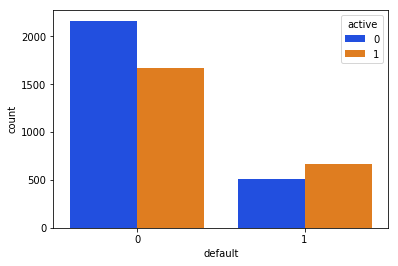

In [55]:
sns.countplot(x='default',data = credit, hue='active', palette="bright")

# Dropping and Selecting the best Features

In [485]:
# correlated with column pets
credit.drop(['pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish'],axis=1,inplace=True)

In [486]:
# High correlation variables
credit.drop(['address','cardtenure', 'card2tenure', 'commute', 'commutecar','commutemotorcycle','commutecarpool','commutebus', 'commuterail',\
                 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute','ed','equipmon', 'lninc',\
    'lncardmon', 'lncardten', 'lnequipmon', 'lnequipten', 'lntollten', 'lnequipmon', 'lnequipten', 'lnwireten','longmon', 'spoused', 'card2tenurecat', 'carvalue', 'lnwireten', 'lnwiremon','wiremon'],axis=1,inplace=True)

In [487]:
credit.drop(['inccat','lncreddebt','lnothdebt','card2spent'],axis=1,inplace=True)

In [488]:
credit.drop(['lnlongten','lntollmon','lnlongmon'],axis=1,inplace=True)

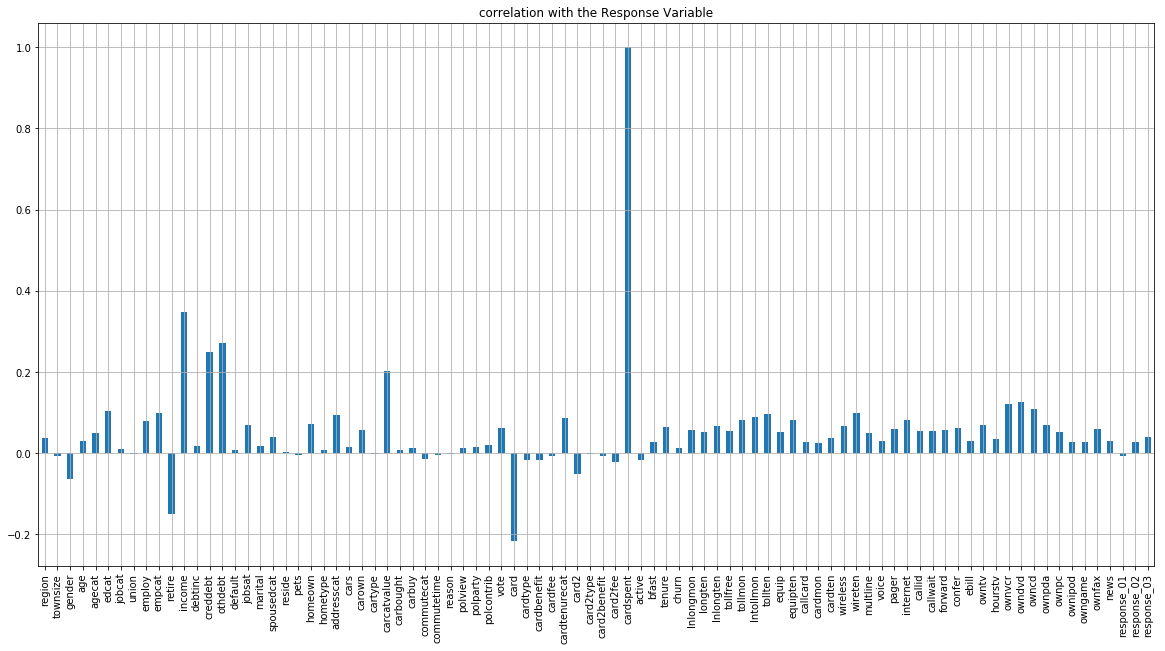

In [77]:
# Checking correlation between each x variables with the respose variable.

credit.corrwith(credit.cardspent).plot.bar(figsize = (20, 10), title = 'correlation with the Response Variable', fontsize = 10, rot = 90, grid = True)

Text(0.5, 1.0, 'Gender vs Income w.r.t default/not default')

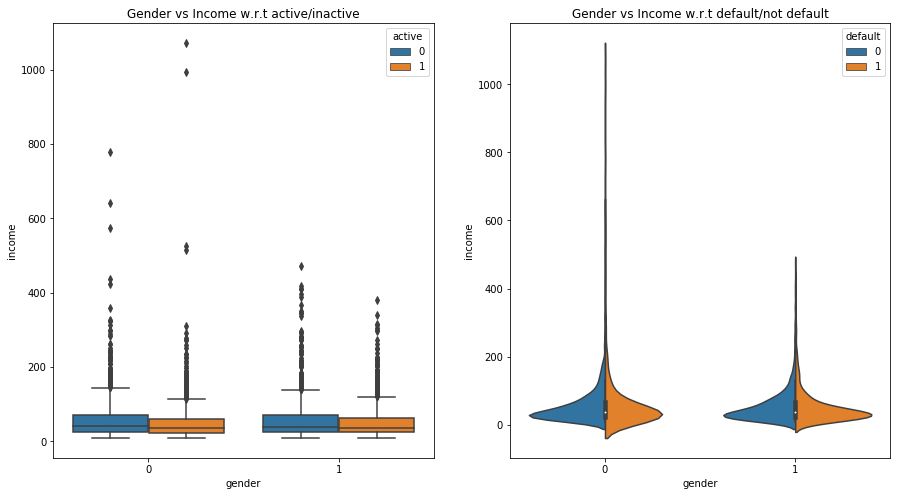

In [64]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,8))

sns.boxplot(x = 'gender', y = 'income', hue = 'active', data = credit, ax = axis1)
axis1.set_title('Gender vs Income w.r.t active/inactive')

sns.violinplot(x = 'gender', y = 'income', hue = 'default', data = credit, split = True, ax = axis2)
axis2.set_title('Gender vs Income w.r.t default/not default')


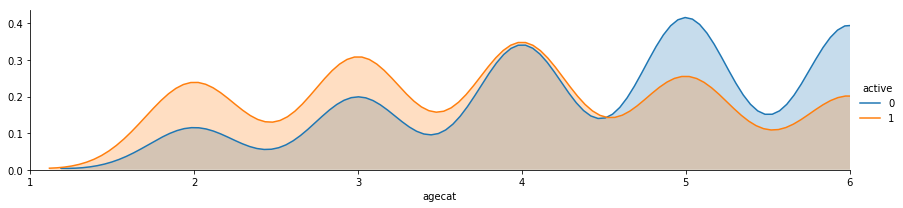

In [70]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( credit, hue = 'active', aspect=4 )
a.map(sns.kdeplot, 'agecat', shade= True )
a.set(xlim=(1 , credit['agecat'].max()))
a.add_legend()

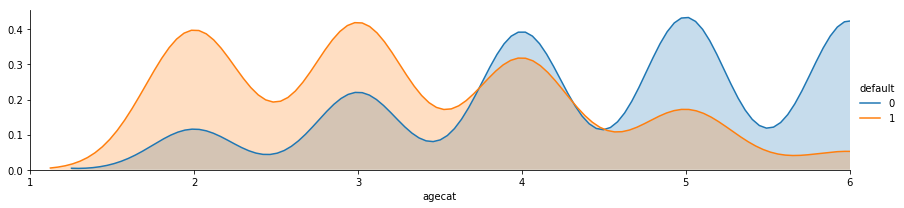

In [71]:
a = sns.FacetGrid( credit, hue = 'default', aspect=4 )
a.map(sns.kdeplot, 'agecat', shade= True )
a.set(xlim=(1 , credit['agecat'].max()))
a.add_legend()

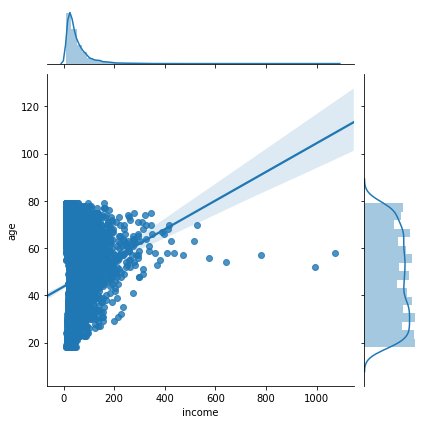

In [78]:
sns.jointplot(x='income',y='age' ,data=credit, kind='reg');

### Checking for missing values

In [489]:
null = credit.isnull().sum()
null[null>0]

townsize       2
commutetime    2
longten        3
cardten        2
dtype: int64

In [490]:
# credit[(credit['townsize'] == nan)]
credit.dropna(inplace=True)

In [491]:
null = credit.isnull().sum()
null[null>0]

Series([], dtype: int64)

## Feature selection Method using
- **(RFE) Recursive Feature Elimination**
- **(VIF) Variance Influence Factor**
- **f_regression**

### RFE

In [35]:
from sklearn.feature_selection import RFE, SelectKBest
X = credit[credit.columns.difference(['cardspent','custid','birthmonth'])]
y = credit['cardspent']

In [36]:
# create the RFE model to select top 6 best feature variables.
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)
rfe = rfe.fit(X,y)

In [37]:
rfe.get_support()

array([False, False, False, False, False,  True,  True, False,  True,
       False,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False, False])

In [38]:
X.columns[rfe.get_support()]

Index(['callcard', 'callid', 'carbought', 'carcatvalue', 'card', 'card2',
       'card2fee', 'carown', 'cartype', 'churn', 'creddebt', 'default',
       'ebill', 'edcat', 'empcat', 'forward', 'gender', 'homeown', 'hometype',
       'internet', 'lnlongmon', 'multline', 'owndvd', 'ownfax', 'ownpda',
       'ownvcr', 'response_03', 'retire', 'voice', 'vote'],
      dtype='object')

###  VIF (Variance Influence Factor)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
all_features = credit[credit.columns.difference(['cardspent','custid','birthmonth'])]
y = credit['cardspent']

In [56]:
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(all_features.values, i) for i in range(all_features.shape[1])]
vif1["features"] = all_features.columns

In [58]:
vif1.sort_values('VIF Factor', ascending=False, inplace=True)#.reset_index(inplace=True)

In [63]:
vif1.head(10)

,VIF Factor,features
3,217.730433,agecat
2,178.708419,age
59,82.823417,owntv
20,47.194557,cardtenurecat
74,38.727050,tenure
34,37.431504,empcat
1,30.055899,addresscat
76,27.166912,tollmon
27,24.272802,commutetime
52,23.212343,owncd


In [62]:
print(list(vif1.features))

['agecat', 'age', 'owntv', 'cardtenurecat', 'tenure', 'empcat', 'addresscat', 'tollmon', 'commutetime', 'owncd', 'hourstv', 'cardmon', 'ownvcr', 'cardten', 'owndvd', 'tollten', 'employ', 'marital', 'edcat', 'income', 'tollfree', 'carcatvalue', 'polview', 'callcard', 'reason', 'jobsat', 'bfast', 'spousedcat', 'card2', 'debtinc', 'townsize', 'cars', 'card', 'reside', 'region', 'equip', 'card2type', 'card2benefit', 'cardbenefit', 'cardtype', 'equipten', 'carown', 'othdebt', 'commutecat', 'wireten', 'wireless', 'jobcat', 'hometype', 'ownpc', 'confer', 'callid', 'callwait', 'forward', 'internet', 'longten', 'multline', 'creddebt', 'voice', 'news', 'homeown', 'retire', 'pager', 'owngame', 'ebill', 'ownipod', 'cartype', 'vote', 'ownpda', 'gender', 'carbought', 'active', 'ownfax', 'default', 'pets', 'churn', 'carbuy', 'polparty', 'polcontrib', 'cardfee', 'card2fee', 'union', 'response_02', 'response_03', 'response_01']


In [76]:
all_features = credit[credit.columns.difference(['cardspent','custid','birthmonth','agecat', 'age', \
                                                 'owntv','addresscat', 'cardtenurecat', 'tenure', 'empcat','tollmon', \
                                                 'commutetime', 'owncd', 'hourstv', 'cardmon', 'ownvcr','marital','owndvd',\
                                                'income','carcatvalue','edcat','polview','reason','bfast'])]
y = credit['cardspent']

In [77]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(all_features.values, i) for i in range(all_features.shape[1])]
vif2["features"] = all_features.columns

In [78]:
vif2.sort_values('VIF Factor', ascending=False, inplace=True)#.reset_index(inplace=True)

In [81]:
print(list(vif2.features))

['jobsat', 'card2', 'cars', 'region', 'card', 'tollfree', 'equip', 'callcard', 'employ', 'card2type', 'card2benefit', 'cardbenefit', 'reside', 'townsize', 'cardtype', 'equipten', 'wireten', 'commutecat', 'wireless', 'ownpc', 'hometype', 'debtinc', 'tollten', 'jobcat', 'confer', 'callid', 'carown', 'callwait', 'forward', 'internet', 'cardten', 'longten', 'othdebt', 'voice', 'multline', 'pager', 'ebill', 'owngame', 'homeown', 'ownipod', 'news', 'creddebt', 'vote', 'cartype', 'ownpda', 'gender', 'ownfax', 'retire', 'active', 'carbought', 'pets', 'spousedcat', 'default', 'churn', 'carbuy', 'polparty', 'polcontrib', 'cardfee', 'card2fee', 'union', 'response_02', 'response_03', 'response_01']


###  f_regression

In [82]:
from sklearn.feature_selection import f_regression
X = credit[credit.columns.difference(['cardspent','custid','birthmonth'])]
y = credit['cardspent']
F_values, p_values  = f_regression(X, y )

In [83]:
F_values, p_values

(array([1.53785062e+00, 4.44904550e+01, 4.83949772e+00, 1.24209108e+01,
        3.94623896e+00, 3.90498146e+00, 1.46702455e+01, 1.51929534e+01,
        3.06623678e-01, 6.36169492e-01, 2.10793716e+02, 2.48205733e+02,
        1.31661201e+01, 2.57012580e-01, 2.48150050e+00, 2.13735251e-02,
        1.39629916e+00, 3.10445334e-01, 3.20649095e+00, 7.07353084e+00,
        3.68997298e+01, 1.61545655e+00, 1.63221556e+01, 1.21136842e+00,
        6.53447053e-03, 6.44792357e-01, 1.01317280e+00, 1.26565597e-01,
        1.95037452e+01, 3.32175048e+02, 1.31786049e+00, 3.57607013e-01,
        4.27303202e+00, 5.35039439e+01, 4.98861320e+01, 3.05733832e+01,
        1.31531714e+01, 3.31743504e+01, 1.62632735e+01, 2.08368900e+01,
        2.55831874e+01, 2.34740280e-01, 6.12867861e+00, 6.89085024e+02,
        3.43253848e+01, 4.17800886e-01, 2.42893223e+01, 1.31529802e+01,
        1.54921922e+00, 1.24302406e+01, 4.40141033e+00, 3.97441653e+02,
        5.98221431e+01, 7.97127183e+01, 1.77941306e+01, 3.928437

In [84]:
f_regression_results = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)

In [85]:
f_regression_results

,0,1,2
0,active,1.537851,2.149963e-01
1,addresscat,44.490455,2.833073e-11
2,age,4.839498,2.786065e-02
3,agecat,12.420911,4.283590e-04
4,bfast,3.946239,4.703083e-02
5,callcard,3.904981,4.819812e-02
6,callid,14.670246,1.296223e-04
7,callwait,15.192953,9.833708e-05
8,carbought,0.306624,5.797843e-01
9,carbuy,0.636169,4.251392e-01


In [86]:
# Renaming columns 
f_regression_results.columns = ['Feature', 'F_value', 'P_value']

In [91]:
f_regression_results.sort_values(by = 'F_value', ascending=False).head(40)

,Feature,F_value,P_value
43,income,689.085024,2.194491e-142
51,othdebt,397.441653,3.778231e-85
29,creddebt,332.175048,6.622485e-72
11,card,248.205733,1.297047e-54
10,carcatvalue,210.793716,8.194494e-47
72,retire,113.570018,3.092452e-26
53,owndvd,79.712718,5.979021e-19
60,ownvcr,75.481302,4.929295e-18
52,owncd,59.822143,1.247634e-14
33,edcat,53.503944,2.991220e-13


In [92]:
print(list(f_regression_results.sort_values(by = 'F_value', ascending=False).head(40)['Feature']))

['income', 'othdebt', 'creddebt', 'card', 'carcatvalue', 'retire', 'owndvd', 'ownvcr', 'owncd', 'edcat', 'empcat', 'wireten', 'tollten', 'addresscat', 'cardtenurecat', 'tollmon', 'internet', 'equipten', 'employ', 'homeown', 'ownpda', 'jobsat', 'owntv', 'wireless', 'gender', 'tenure', 'confer', 'vote', 'pager', 'ownfax', 'carown', 'forward', 'callwait', 'tollfree', 'callid', 'ownpc', 'card2', 'equip', 'longten', 'multline']


In [98]:
# Top 30 Features from different feature Selection Methods.
RFE = ['callcard', 'callid', 'carbought', 'carcatvalue', 'card', 'card2',
               'card2fee', 'carown', 'cartype', 'churn', 'creddebt', 'default',
               'ebill', 'edcat', 'empcat', 'forward', 'gender', 'homeown', 'hometype',
               'internet', 'lnlongmon', 'multline', 'owndvd', 'ownfax', 'ownpda',
               'ownvcr', 'response_03', 'retire', 'voice', 'vote'] 
VIF = ['othdebt', 'voice', 'multline', 'pager', 'ebill', 'owngame', 'homeown', 'ownipod', 'news', 
       'creddebt', 'vote', 'cartype', 'ownpda', 'gender', 'ownfax', 'retire', 'active', 'carbought', 'pets', 
       'spousedcat', 'default', 'churn', 'carbuy', 'polparty', 'polcontrib', 'cardfee', 'card2fee', 'union', 
       'response_02', 'response_03', 'response_01']
f_reg = ['income', 'othdebt', 'creddebt', 'card', 'carcatvalue', 'retire', 'owndvd', 'ownvcr', 'owncd', 'edcat',
        'empcat', 'wireten', 'tollten', 'addresscat', 'cardtenurecat', 'tollmon', 'internet', 'equipten', 'employ', 
        'homeown','ownpda', 'jobsat', 'owntv', 'wireless', 'gender', 'tenure', 'confer', 'vote', 'pager', 'ownfax',
        'carown', 'forward','callwait', 'tollfree', 'callid', 'ownpc', 'card2', 'equip', 'longten', 'multline']

In [104]:
f1 = []
for i in RFE:
    if i in VIF:
        f1.append(i)
    elif i in f_reg:
        f1.append(i)
    else:
        pass
print(f1)

['callid', 'carbought', 'carcatvalue', 'card', 'card2', 'card2fee', 'carown', 'cartype', 'churn', 'creddebt', 'default', 'ebill', 'edcat', 'empcat', 'forward', 'gender', 'homeown', 'internet', 'multline', 'owndvd', 'ownfax', 'ownpda', 'ownvcr', 'response_03', 'retire', 'voice', 'vote']


In [103]:
f2 = []
for i in VIF:
    if i in f_reg:
        f2.append(i)
print(f2)        

['othdebt', 'multline', 'pager', 'homeown', 'creddebt', 'vote', 'ownpda', 'gender', 'ownfax', 'retire']


In [114]:
features = f1+f2
features = list(set(features))
print(features)

['pager', 'churn', 'multline', 'ownvcr', 'forward', 'vote', 'owndvd', 'homeown', 'response_03', 'callid', 'cartype', 'edcat', 'carcatvalue', 'retire', 'gender', 'card2', 'ownpda', 'carown', 'creddebt', 'othdebt', 'ownfax', 'ebill', 'carbought', 'empcat', 'internet', 'card', 'voice', 'card2fee', 'default']


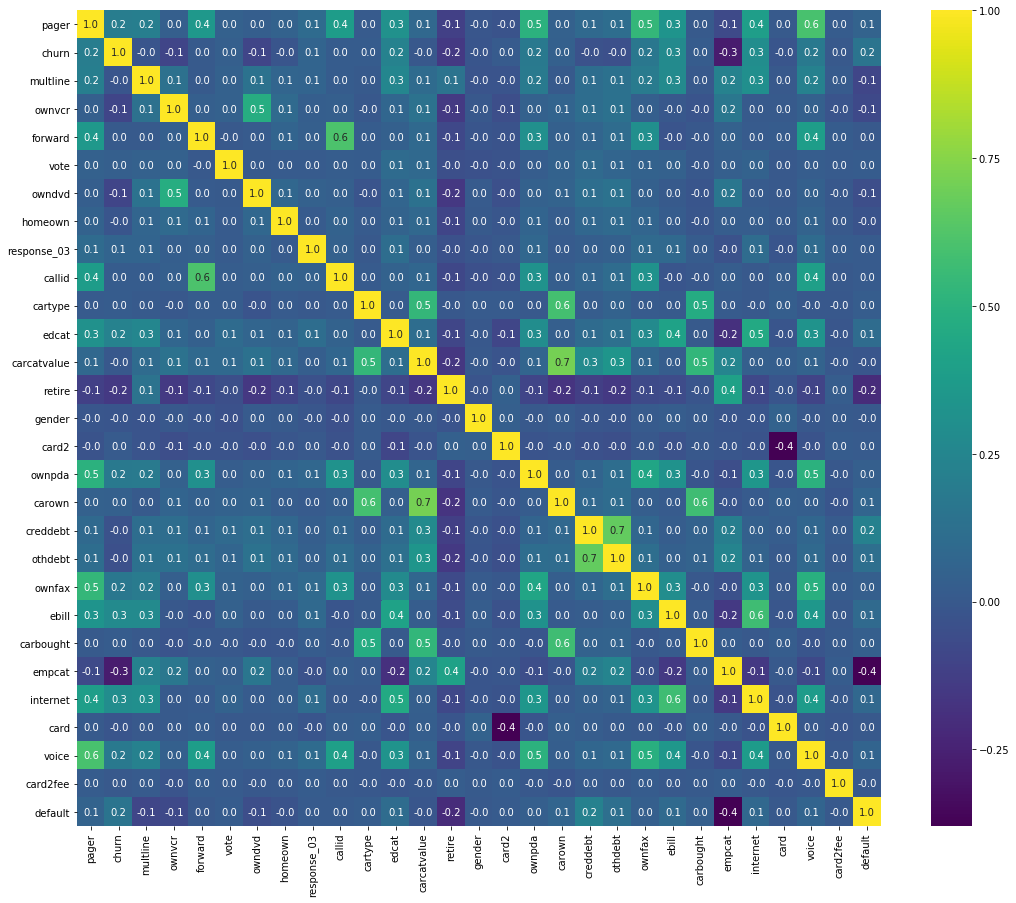

In [122]:
plt.figure(figsize=(18,15))
sns.heatmap(credit[features].corr(), annot=True, cmap='viridis', fmt='.1f')

In [123]:
sns.pairplot(credit[features])

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000023BDDCFA2F0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023BDDD07E18> (for post_execute):


KeyboardInterrupt: 

# Modelling Based on OLS Models

In [70]:
# At first feeding all the features and will find out the best features and recheck with above feature selection methods
best_features = credit[credit.columns.difference(['cardspent','custid','birthmonth'])]

In [71]:
# split the data into training and testing samples 
train_X, test_X, train_y, test_y = train_test_split(best_features, credit['cardspent'], test_size =0.3, random_state =123)

In [72]:
formula = 'cardspent ~ '+'+'.join(best_features.columns)

In [73]:
formula

'cardspent ~ active+addresscat+age+agecat+bfast+callcard+callid+callwait+carbought+carbuy+carcatvalue+card+card2+card2benefit+card2fee+card2type+cardbenefit+cardfee+cardmon+cardten+cardtenurecat+cardtype+carown+cars+cartype+churn+commutecat+commutetime+confer+creddebt+debtinc+default+ebill+edcat+empcat+employ+equip+equipten+forward+gender+homeown+hometype+hourstv+income+internet+jobcat+jobsat+longten+marital+multline+news+othdebt+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+pets+polcontrib+polparty+polview+reason+region+reside+response_01+response_02+response_03+retire+spousedcat+tenure+tollfree+tollmon+tollten+townsize+union+voice+vote+wireless+wireten'

In [74]:
#To build model using stats models
train, test = train_test_split(credit, test_size =0.3, random_state =123)

In [75]:
train = pd.concat([train_X, train_y], axis=1)
test = pd.concat([test_X, test_y], axis=1)

In [76]:
#Building model
lm_model = sm.ols(formula, data=train)
lm_model = lm_model.fit()


In [77]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:              cardspent   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     12.30
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          2.07e-139
Time:                        09:49:34   Log-Likelihood:                -23797.
No. Observations:                3496   AIC:                         4.776e+04
Df Residuals:                    3411   BIC:                         4.829e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       432.2623     57.862      7.471

In [492]:
# Dropping the variables which have high p-value mean which are less significant
credit.drop(['bfast','carbuy','card2benefit','cardfee','cardten','cars','commutetime','confer','empcat','employ','forward','homeown',
             'longten','multline','news','owngame','ownipod','ownpc','pager','polcontrib','polparty','polview','reason','reside',
             'response_01','tenure','tollfree','tollmon','union','custid'],axis=1,inplace=True)

In [79]:
# Rechecking the model evaluation with remaining features
best_features = credit[credit.columns.difference(['cardspent','birthmonth'])]

In [80]:
# split the data into training and testing samples 
train_X, test_X, train_y, test_y = train_test_split(best_features, credit['cardspent'], test_size =0.3, random_state =123)

In [81]:
formula = 'cardspent ~ '+'+'.join(best_features.columns)

In [82]:
formula

'cardspent ~ active+addresscat+age+agecat+callcard+callid+callwait+carbought+carcatvalue+card+card2+card2fee+card2type+cardbenefit+cardmon+cardtenurecat+cardtype+carown+cartype+churn+commutecat+creddebt+debtinc+default+ebill+edcat+equip+equipten+gender+hometype+hourstv+income+internet+jobcat+jobsat+marital+othdebt+owncd+owndvd+ownfax+ownpda+owntv+ownvcr+pets+region+response_02+response_03+retire+spousedcat+tollten+townsize+voice+vote+wireless+wireten'

In [83]:
#To build model using stats models
train, test = train_test_split(credit, test_size =0.3, random_state =123)

In [84]:
train = pd.concat([train_X, train_y], axis=1)
test = pd.concat([test_X, test_y], axis=1)

In [85]:
#Building model
lm_model = sm.ols(formula, data=train)
lm_model = lm_model.fit()


In [86]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:              cardspent   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     18.88
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          4.46e-156
Time:                        09:49:59   Log-Likelihood:                -23798.
No. Observations:                3496   AIC:                         4.771e+04
Df Residuals:                    3440   BIC:                         4.805e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       429.5731     47.319      9.078

In [493]:
# Dropping the variables with high p-values(>0.05)
credit.drop(['townsize','response_03','response_02','region','ownvcr','owntv','ownpda','owncd','othdebt',
             'marital','jobcat','active','agecat','callid','callwait','card2type','cardbenefit','cardmon',
             'cardtenurecat','cardtype','churn','commutecat','ebill','edcat'],axis=1,inplace=True)

In [88]:
# Evaluating the model based on remaining features
best_features = credit[credit.columns.difference(['cardspent','birthmonth'])]

In [89]:
# split the data into training and testing samples 
train_X, test_X, train_y, test_y = train_test_split(best_features, credit['cardspent'], test_size =0.3, random_state =123)

In [90]:
formula = 'cardspent ~ '+'+'.join(best_features.columns)

In [91]:
formula

'cardspent ~ addresscat+age+callcard+carbought+carcatvalue+card+card2+card2fee+carown+cartype+creddebt+debtinc+default+equip+equipten+gender+hometype+hourstv+income+internet+jobsat+owndvd+ownfax+pets+retire+spousedcat+tollten+voice+vote+wireless+wireten'

In [92]:
#To build model using stats models
train, test = train_test_split(credit, test_size =0.3, random_state =123)

In [93]:
train = pd.concat([train_X, train_y], axis=1)
test = pd.concat([test_X, test_y], axis=1)

In [94]:
#Building model
lm_model = sm.ols(formula, data=train)
lm_model = lm_model.fit()


In [95]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:              cardspent   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     33.00
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          3.29e-169
Time:                        09:50:14   Log-Likelihood:                -23807.
No. Observations:                3496   AIC:                         4.768e+04
Df Residuals:                    3464   BIC:                         4.788e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     441.5696     30.541     14.458      

In [494]:
# Dropping the variables which are less significant
credit.drop(['age','hourstv','jobsat','spousedcat'],axis=1,inplace=True)

In [97]:
# Re-evaluating the model based on remaining features
best_features = credit[credit.columns.difference(['cardspent','birthmonth'])]

In [98]:
# split the data into training and testing samples 
train_X, test_X, train_y, test_y = train_test_split(best_features, credit['cardspent'], test_size =0.3, random_state =123)

In [99]:
formula = 'cardspent ~ '+'+'.join(best_features.columns)

In [100]:
formula

'cardspent ~ addresscat+callcard+carbought+carcatvalue+card+card2+card2fee+carown+cartype+creddebt+debtinc+default+equip+equipten+gender+hometype+income+internet+owndvd+ownfax+pets+retire+tollten+voice+vote+wireless+wireten'

In [101]:
#To build model using stats models
train, test = train_test_split(credit, test_size =0.3, random_state =123)

In [102]:
train = pd.concat([train_X, train_y], axis=1)
test = pd.concat([test_X, test_y], axis=1)

In [103]:
#Building model
lm_model = sm.ols(formula, data=train)
lm_model = lm_model.fit()


In [104]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:              cardspent   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     37.70
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          2.78e-171
Time:                        09:50:41   Log-Likelihood:                -23810.
No. Observations:                3496   AIC:                         4.768e+04
Df Residuals:                    3468   BIC:                         4.785e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     443.9748     26.308     16.876      

In [495]:
# Dropping the variables
credit.drop(['card2fee','addresscat','cartype','wireless','wireten','equipten','pets','equip','callcard','vote','tollten'], axis=1,inplace=True)

In [496]:
credit.drop('birthmonth',axis=1,inplace=True)

In [307]:
# Re-Evaluating the model
best_features = credit[credit.columns.difference(['cardspent'])]

In [308]:
# split the data into training and testing samples 
train_X, test_X, train_y, test_y = train_test_split(best_features, credit['cardspent'], test_size =0.3, random_state =123)

In [309]:
formula = 'cardspent ~ '+'+'.join(best_features.columns)

In [310]:
formula

'cardspent ~ carbought+carcatvalue+card+card2+carown+creddebt+debtinc+default+gender+hometype+income+internet+owndvd+ownfax+retire+voice'

In [311]:
#To build model using stats models
train, test = train_test_split(credit, test_size =0.3, random_state =123)

In [312]:
train = pd.concat([train_X, train_y], axis=1)
test = pd.concat([test_X, test_y], axis=1)

In [313]:
#Building model
lm_model = sm.ols(formula, data=train)
lm_model = lm_model.fit()


In [314]:
print(lm_model.summary())

                            OLS Regression Results                            
Dep. Variable:              cardspent   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     61.67
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          5.90e-175
Time:                        11:27:28   Log-Likelihood:                -23823.
No. Observations:                3496   AIC:                         4.768e+04
Df Residuals:                    3479   BIC:                         4.778e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     442.7254     23.954     18.483      

In [ ]:
# Best_features from OLS Modeling
best_features = ['carbought','carcatvalue','card','card2','carown','creddebt','debtinc','default','gender','hometype',
                 'income','internet','owndvd','ownfax','retire','voice']

# Outlier Detection and Handling

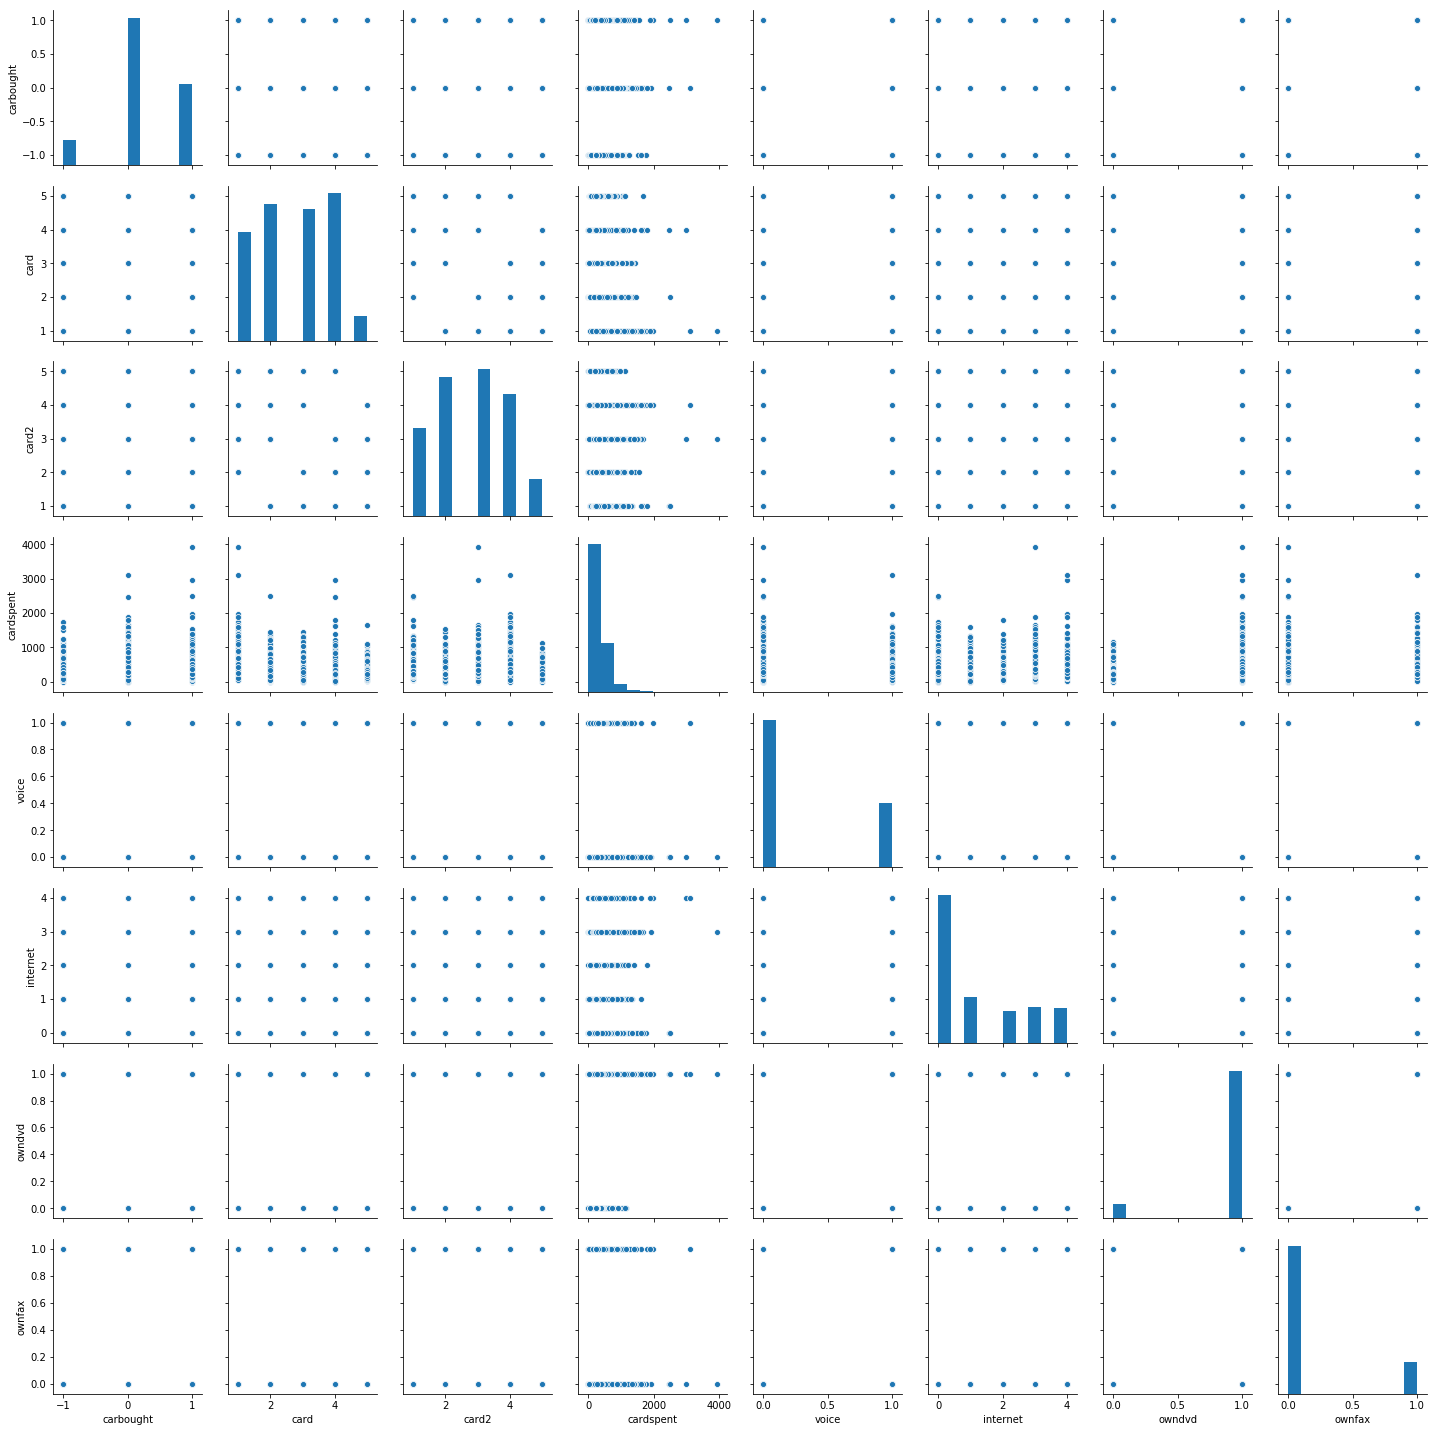

In [269]:
sns.pairplot(credit.iloc[:,10:])
# credit2.iloc[:,0:10]

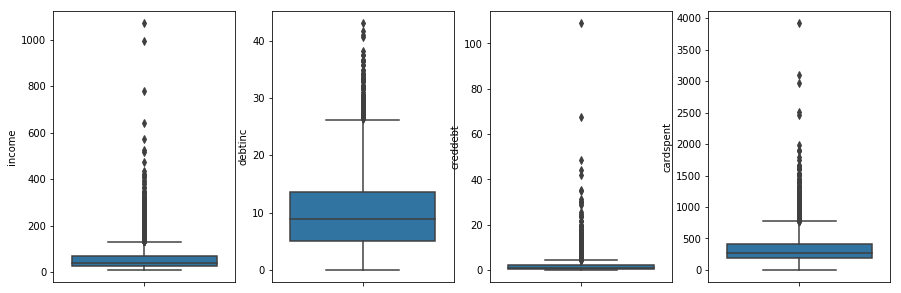

In [497]:
plt.figure(figsize=(15,5))
num_features = ['income','debtinc','creddebt','cardspent']
cat_features = ['gender', 'retire', 'default',
                'hometype', 'carown', 'carcatvalue', 'carbought', 'card', 'card2',
                'voice', 'internet', 'owndvd', 'ownfax']
for i,j in enumerate(num_features):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=j,data=credit)

In [498]:
# Handling Outliers 
def outlier_capping(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))
    return x

credit_num = credit[num_features].apply(lambda x: outlier_capping(x))

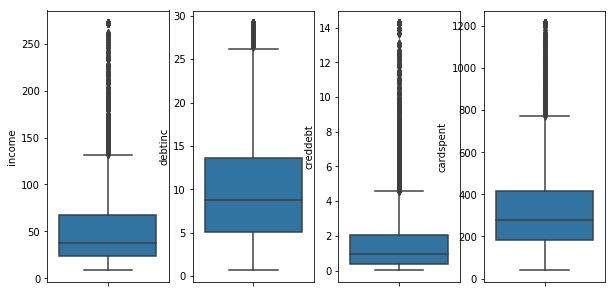

In [499]:
plt.figure(figsize=(10,5))
num_features = ['income','debtinc','creddebt','cardspent']
for i,j in enumerate(num_features):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=j,data=credit_num)

In [ ]:
plt.figure(figsize=(15,10))
credit_cat = credit[cat_features]
for i,j in enumerate(cat_features):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=j,data=credit_cat)

In [594]:
df1 = credit[num_features]
df2 = credit[cat_features]
credit_new = pd.concat([df1,df2],axis=1)


In [377]:
for i in cat_features:
    print(f'{i}:',credit[i].unique())

gender: [1 0]
retire: [0 1]
default: [1 0]
hometype: [2 3 1 4]
carown: [ 1  0 -1]
carcatvalue: [ 1 -1  2  3]
carbought: [ 0 -1  1]
card: [3 2 4 5 1]
card2: [5 4 3 1 2]
voice: [1 0]
internet: [0 4 2 3 1]
owndvd: [1 0]
ownfax: [0 1]


##  Evaluating Skewness
####  Reduce skewness (Log transformation)

Here, skewness is our enemy since we gonna work with linear models ( Oh sorry for the spoil :'(  , you know in the last episode of Game of thrones ... okay okay promise i'll shut up :p).

So we need to reduce this skewness, one solution is too use a log transformation.

I choosed the log1p to deal with 0 values.

But first let's see how our numerical features are skewed.

In [501]:
def multiplot(data,features,plottype,nrows,ncols,figsize,y=None,colorize=False):
    """ This function draw a multi plot for 3 types of plots ["regplot","distplot","coutplot"]"""
    n = 0
    plt.figure(1)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    if colorize:
        colors = sns.color_palette(n_colors=(nrows*ncols))
    else :
        colors = [None]*(nrows*ncols)
        
    for row in range(ncols):
        for col in range(nrows):
            
            if plottype == 'regplot':
                if y == None:
                    raise ValueError('y value is needed with regplot type')
                
                sns.regplot(data = data, x = features[n], y = y ,ax=axes[row,col], color = colors[n])
                correlation = np.corrcoef(data[features[n]],data[y])[0,1]
                axes[row,col].set_title("Correlation {:.2f}".format(correlation))
            
            elif plottype == 'distplot':
                sns.distplot(a = data[features[n]],ax = axes[row,col],color=colors[n])
                skewness = data[features[n]].skew()
                axes[row,col].legend(["Skew : {:.2f}".format(skewness)])
            
            elif plottype in ['countplot']:
                g = sns.countplot(x = data[features[n]], y = y, ax = axes[row,col],color = colors[n])
                g = plt.setp(g.get_xticklabels(), rotation=45)
                
            n += 1
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()

<Figure size 432x288 with 0 Axes>

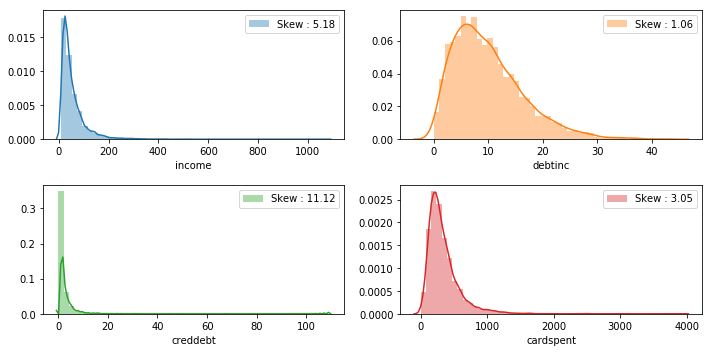

<Figure size 432x288 with 0 Axes>

In [502]:
multiplot(data = credit_new,features = num_features,plottype = "distplot",
          nrows = 2, ncols = 2, figsize = (10,5), colorize = True)

Most of them have a positive skewness.

In [503]:
for feature in num_features:
    credit_new[feature] = np.log1p(credit_new[feature])

<Figure size 432x288 with 0 Axes>

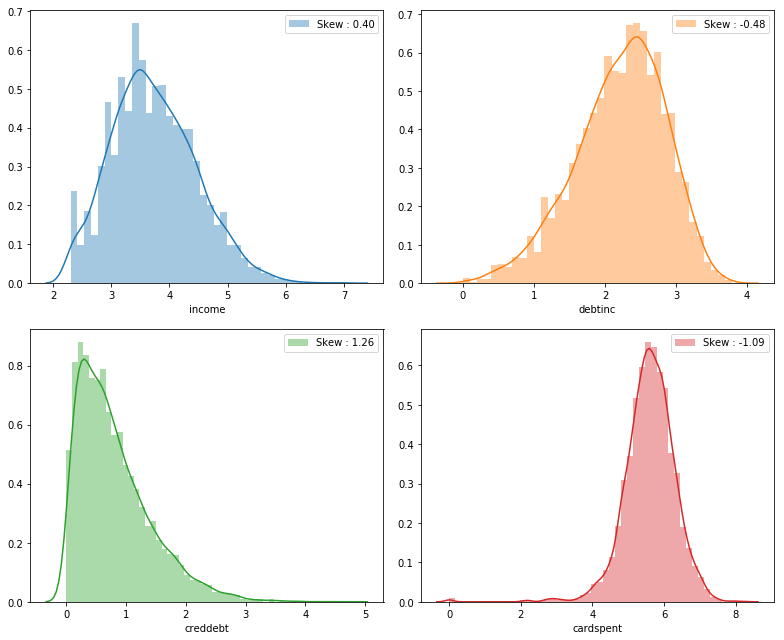

<Figure size 432x288 with 0 Axes>

In [504]:
multiplot(data = credit_new,features = num_features,plottype = "distplot",
          nrows = 2, ncols = 2, figsize = (11,9), colorize = True)

In [609]:
credit_new.head()

,income,debtinc,creddebt,cardspent,gender,retire,default,hometype,carown,carcatvalue,carbought,card,card2,voice,internet,owndvd,ownfax
0,31,11.1,1.200909,81.66,1,0,1,2,1,1,0,3,5,1,0,1,0
1,15,18.6,1.222020,42.60,0,0,1,3,1,1,0,2,4,1,4,1,1
2,35,9.9,0.928620,184.22,1,0,0,1,1,1,0,2,4,0,0,1,0
3,20,5.7,0.022800,340.99,0,0,1,3,1,1,0,2,3,0,2,1,0
4,23,1.7,0.214659,255.10,0,0,0,2,0,1,0,4,1,1,3,1,0


In [626]:
# credit_new.drop([1657,1716,2799,2878,4099,4714,4890],axis=0,inplace=True)
credit_new = credit_new.reset_index().drop('index',axis=1)

In [627]:
X = credit_new[credit_new.columns.difference(['cardspent'])]
y= credit_new['cardspent']

In [629]:
y.shape

(4988,)

In [630]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

C:\anaconda3old\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys


Index(['carbought', 'carcatvalue', 'card', 'card2', 'carown', 'creddebt',
       'debtinc', 'default', 'gender', 'hometype', 'income', 'internet',
       'owndvd', 'ownfax', 'retire', 'voice'],
      dtype='object')

In [632]:
# X

In [633]:
credit2 = pd.concat([X,y],axis=1)

In [638]:
# credit2[credit2.cardspent <=0]

,carbought,carcatvalue,card,card2,carown,creddebt,debtinc,default,gender,hometype,income,internet,owndvd,ownfax,retire,voice,cardspent


In [639]:
#To build model using stats models
train, test = train_test_split(credit2, test_size =0.3, random_state =123)

In [640]:
train_X = train[train.columns.difference(['cardspent'])]
train_y = train['cardspent']

In [679]:
test_X = test[test.columns.difference(['cardspent'])]
test_y = test['cardspent']

In [650]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [651]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

340.23420307647973
[ -5.95141695  22.8348935  -64.88686671 -27.91423671  -7.07679449
  33.44707178 -10.33181438  -3.3670911  -10.9783202    9.59875439
  57.31055466  17.63419096  10.7832235    7.7809652  -19.74344897
 -13.81809779]


In [655]:
# train['pred'] = pd.DataFrame(np.exp(lr.predict(train_X)))
train_pred = pd.DataFrame(lr.predict(train_X))

In [685]:
test_pred = pd.DataFrame(lr.predict(test_X))

In [690]:
test_y.head()

1017     86.14
1765     50.40
1469    121.63
4152    200.50
3268    151.22
Name: cardspent, dtype: float64

In [691]:
test_pred.head()

,0
0,244.297123
1,282.536700
2,294.354399
3,308.030756
4,274.003742


In [686]:
train_cardspent = train_y.reset_index().drop('index',axis=1)
pred_result = pd.concat([train_cardspent,train_pred],axis=1)
pred_result.columns = ['cardspent','pred']

In [687]:
test_cardspent = test_y.reset_index().drop('index',axis=1)
pred_result2 = pd.concat([test_cardspent,test_pred],axis=1)
pred_result2.columns = ['cardspent','pred']

In [692]:
# pred_result2

In [713]:
#Train Data
MAPE_pred_result = np.mean(np.abs(pred_result.cardspent - pred_result.pred)/pred_result.cardspent )
print('Train MAPE',MAPE_pred_result)
MSE_pred_result = metrics.mean_squared_error(pred_result.cardspent , pred_result.pred)
print('Train MSE: ',MSE_pred_result)

from sklearn.metrics import mean_squared_error, r2_score
R_square = r2_score(pred_result.cardspent, pred_result.pred)
print('Train R_square: ',R_square)

rmse = np.sqrt(mean_squared_error(pred_result.cardspent, pred_result.pred))
print('Train RMSE: ',rmse)
print()

#Test Data
MAPE_pred_result = np.mean(np.abs(pred_result2.cardspent - pred_result2.pred)/pred_result2.cardspent )
print('Test MAPE',MAPE_pred_result)
MSE_pred_result = metrics.mean_squared_error(pred_result2.cardspent , pred_result2.pred)
print('Test MSE: ',MSE_pred_result)

from sklearn.metrics import mean_squared_error,r2_score
R_square = r2_score(pred_result2.cardspent, pred_result2.pred)
print('Test R_square: ',R_square)
rmse = np.sqrt(mean_squared_error(pred_result2.cardspent, pred_result2.pred))
print('Test RMSE: ',rmse)


Train MAPE 0.6971621283832669
Train MSE:  48631.1561432042
Train R_square:  0.21777104073013165
Train RMSE:  220.52472909677093

Test MAPE 0.7677402351584175
Test MSE:  46552.826165383995
Test R_square:  0.15543130408833983
Test RMSE:  215.7610394982931


Text(0, 0.5, 'Sales')

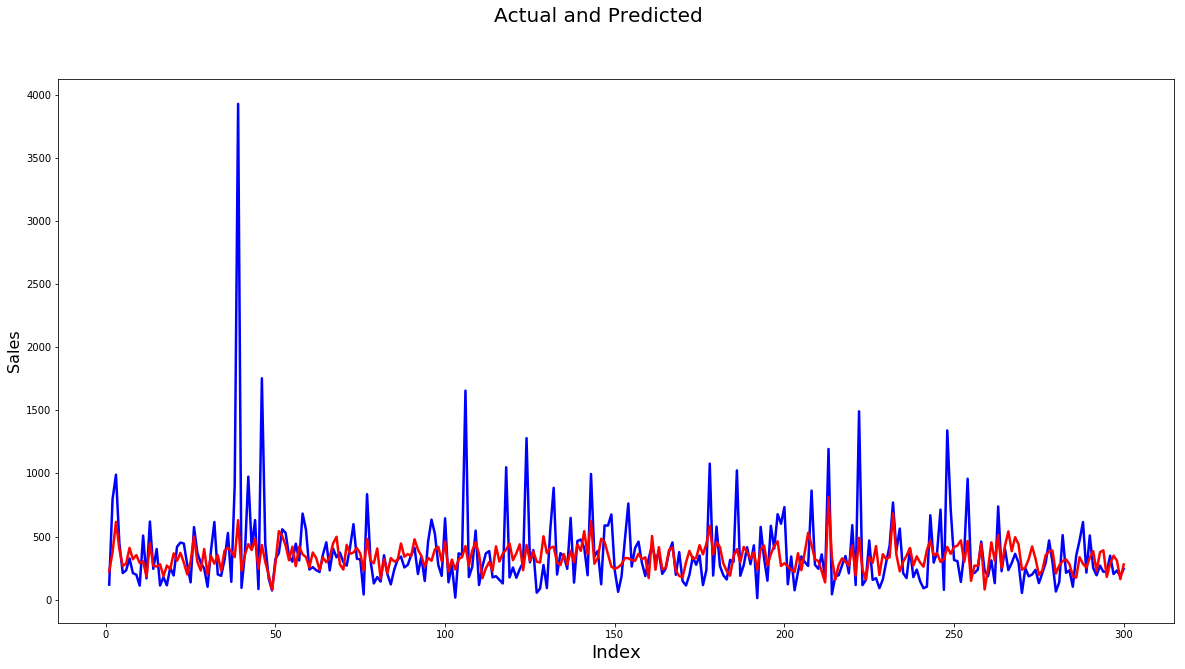

In [695]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,301,1)]         # generating index 
fig = plt.figure(figsize=(20,10))
plt.plot(c,pred_result.cardspent.head(300), color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,pred_result.pred.head(300), color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

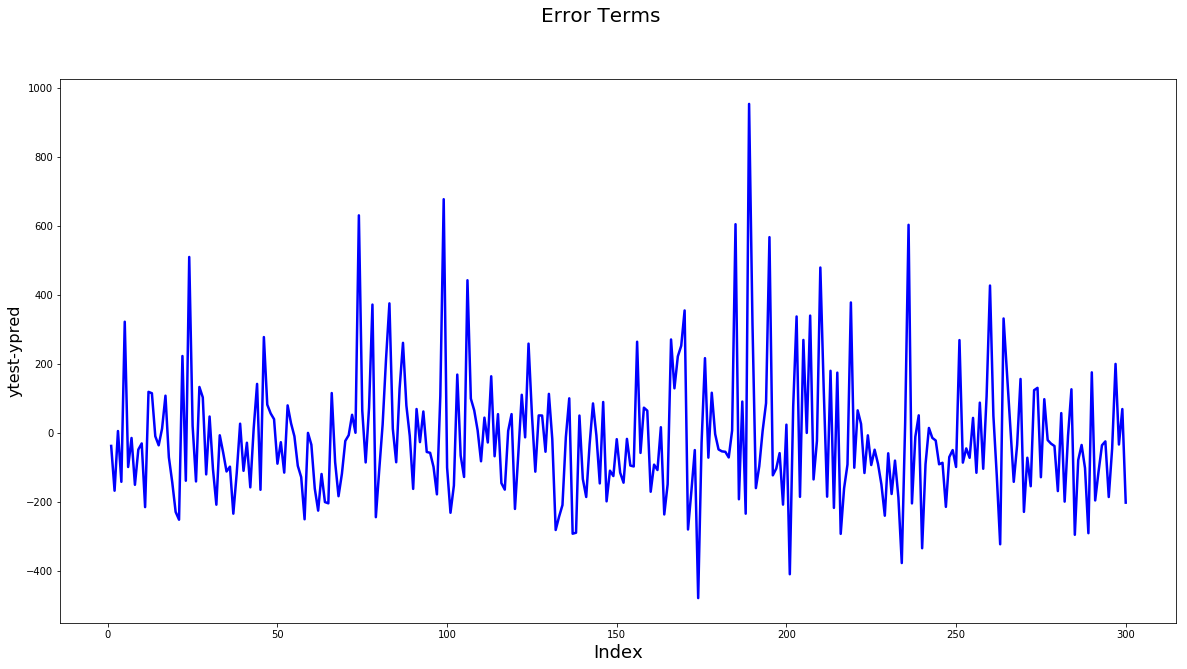

In [366]:
# Error terms
c = [i for i in range(1,301,1)]
fig = plt.figure(figsize=(20,10))
plt.plot(c,test_y.head(300)-y_pred[0:300], color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'Predicted Y')

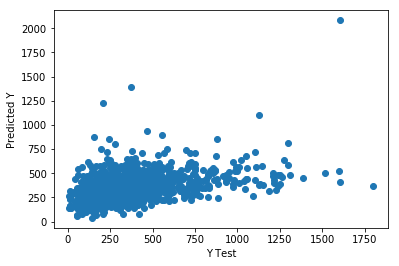

In [699]:
import matplotlib.pyplot as plt
plt.scatter(pred_result2.cardspent,pred_result2.pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

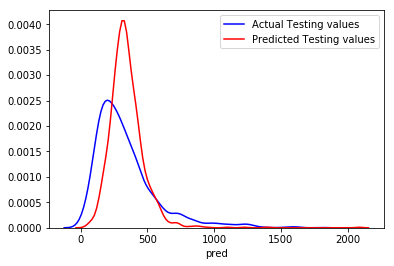

In [698]:
# Plot of actual Testing values vs Predicted Testing values
axs = sns.distplot(pred_result2.cardspent, hist=False, color='b', label="Actual Testing values")
sns.distplot(pred_result2.pred, hist=False, color='r', label="Predicted Testing values", ax=axs)

In [720]:
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import xgboost as xgb

In [702]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score
# from lightgbm import LGBMRegressor

In [721]:
def RMSE(estimator,X_train, Y_train, cv=5,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()
scorer = make_scorer(score_func=RMSE, greater_is_better=False)

In [722]:
lassocv = LassoCV(eps=1e-7) 
ridge = Ridge(alpha=1e-6) 
lassolarscv = LassoLarsCV()
elasticnetcv = ElasticNetCV(eps=1e-15)

In [724]:
RMSE(lassocv, train_X, train_y)#0.1138

220.4409253315449

In [725]:
RMSE(ridge, train_X, train_y)#0.1211

220.4531614088772

In [728]:
RMSE(lassolarscv, train_X, train_y)#0.1154

220.38347728180005

In [727]:
RMSE(elasticnetcv, train_X, train_y)#0.1140

220.39239320250664

In [734]:
from sklearn import linear_model

## Linear Regression (Regularization : Ridge)

In [737]:
# Initializing Model
Ridge = linear_model.Ridge(alpha=0.1)

# Fitting Model
Ridge.fit(train_X,train_y)

# Predicting Values
pred_linmodel_ridge = Ridge.predict(train_X)

# Checking Accuracy (on Test dataset)
acc_ridge = round(metrics.r2_score(train_y,pred_linmodel_ridge),3)

# Finding Coefficients
Ridge_coef = pd.DataFrame(Ridge.coef_,train_X.columns,columns=['Ridge_Coefficient'])

# Reseting Index
Ridge_coef = Ridge_coef.reset_index()

# Renaming the columns
Ridge_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features_Ridge = Ridge_coef[Ridge_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names_Ridge=Selected_Features_Ridge.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features_Ridge = len(Selected_Features_Ridge)


print('Accuracy achieved using Linear Regression (Regularization : Ridge) is:',acc_ridge,"while the number of features used are",Number_of_Selected_Features_Ridge,"with the selected features being",Selected_Features_names_Ridge)

Accuracy achieved using Linear Regression (Regularization : Ridge) is: 0.218 while the number of features used are 16 with the selected features being ['carbought' 'carcatvalue' 'card' 'card2' 'carown' 'creddebt' 'debtinc'
 'default' 'gender' 'hometype' 'income' 'internet' 'owndvd' 'ownfax'
 'retire' 'voice']


## Linear Regression (Regularization : Lasso)

In [738]:
# Initializing Model
Lasso = linear_model.Lasso(alpha=0.07)

# Fitting Model
Lasso.fit(train_X,train_y)

# Predicting Values
pred_linmodel_lasso = Lasso.predict(train_X)

# Checking Accuracy (on Test dataset)
acc_lasso = round(metrics.r2_score(train_y,pred_linmodel_lasso),3)

# Finding Coefficients
Lasso_coef = pd.DataFrame(Lasso.coef_,train_X.columns,columns=['Lasso_Coefficient'])

# Reseting Index
Lasso_coef = Lasso_coef.reset_index()

# Renaming the columns
Lasso_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features_Lasso = Lasso_coef[Lasso_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names_Lasso=Selected_Features_Lasso.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features_Lasso = len(Selected_Features_Lasso)


print('Accuracy achieved using Linear Regression (Regularization : Lasso) is:',acc_lasso,"while the number of features used are",Number_of_Selected_Features_Lasso,"with the selected features being",Selected_Features_names_Lasso)

Accuracy achieved using Linear Regression (Regularization : Lasso) is: 0.218 while the number of features used are 16 with the selected features being ['carbought' 'carcatvalue' 'card' 'card2' 'carown' 'creddebt' 'debtinc'
 'default' 'gender' 'hometype' 'income' 'internet' 'owndvd' 'ownfax'
 'retire' 'voice']


## Linear Regression (Regularization : Elastic Net)

In [739]:
# Initializing Model
Elastic = linear_model.ElasticNet(alpha=0.1)

# Fitting Model
Elastic.fit(train_X,train_y)

# Predicting Values
pred_linmodel_Elastic = Elastic.predict(train_X)

# Checking Accuracy (on Test dataset)
acc_Elastic = round(metrics.r2_score(train_y,pred_linmodel_Elastic),3)

# Finding Coefficients
Elastic_coef = pd.DataFrame(Elastic.coef_,train_X.columns,columns=['Elastic_Coefficient'])

# Reseting Index
Elastic_coef = Elastic_coef.reset_index()

# Renaming the columns
Elastic_coef.columns = ['Features','Coefficient']

# Selecting the features and coeff that have been considered for the model
Selected_Features_Elastic = Elastic_coef[Elastic_coef['Coefficient']!=0]

# Extracting the features name that have been selected for model building
Selected_Features_names_Elastic=Selected_Features_Elastic.Features.unique()

# Finding the number of features name that have been selected for model building
Number_of_Selected_Features_Elastic = len(Selected_Features_Elastic)


print('Accuracy achieved using Linear Regression (Regularization : Elastic) is:',acc_Elastic,"while the number of features used are",Number_of_Selected_Features_Elastic,"with the selected features being",Selected_Features_names_Elastic)

Accuracy achieved using Linear Regression (Regularization : Elastic) is: 0.217 while the number of features used are 16 with the selected features being ['carbought' 'carcatvalue' 'card' 'card2' 'carown' 'creddebt' 'debtinc'
 'default' 'gender' 'hometype' 'income' 'internet' 'owndvd' 'ownfax'
 'retire' 'voice']


In [748]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [749]:
param_grid = {'max_depth': np.arange(3, 12),
             'max_features': np.arange(3,10)}

tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring='r2')
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]), 'max_features': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [750]:
tree.best_score_

0.18734609803947294

In [751]:
tree.best_params_

{'max_depth': 4, 'max_features': 8}

In [752]:
tree.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=8,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [753]:
# Finding Accuracy on Test dataset

Pred_DTR = tree.predict(test_X)
Accuracy = metrics.r2_score(test_y,Pred_DTR)
Accuracy

0.23817358549180956

In [755]:
import sklearn.ensemble as en

In [756]:
dir(en)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

In [758]:
from sklearn.ensemble import BaggingRegressor

In [759]:
BaggingRegressor?

In [766]:
bagreg = BaggingRegressor(oob_score=True, n_estimators=500, verbose=True, n_jobs=-1)
bagreg.fit(train_X, train_y)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    8.3s remaining:    8.3s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    9.6s finished


BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=500, n_jobs=-1, oob_score=True, random_state=None,
         verbose=True, warm_start=False)

In [767]:
bagreg.predict(train_X)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    4.4s remaining:    4.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    6.9s finished


array([151.25784, 673.81208, 772.16388, ..., 585.08044, 471.98896,
       238.4982 ])

In [768]:
bagreg.oob_score_

0.1704402227839774

In [88]:
y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagclm.predict( test_X) } )

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.1s finished


In [769]:
pargrid_bagging = {'n_estimators':  [100,300,500,700]}

from sklearn.model_selection import GridSearchCV
gscv_bagging = GridSearchCV(estimator=BaggingRegressor(), 
                        param_grid=pargrid_bagging, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [770]:
gscv_results = gscv_bagging.fit(train_X, train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.6min finished


In [771]:
gscv_results.best_params_

{'n_estimators': 500}

In [772]:
gscv_results.best_score_

0.14615170037759118

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [116]:
radm_clf.n_features_

18

In [117]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [118]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9875555555555555